<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Data Pre=Processing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading in the MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
single_image=X_train[1]

In [6]:
single_image.shape

(28, 28)

Visulaizing Data

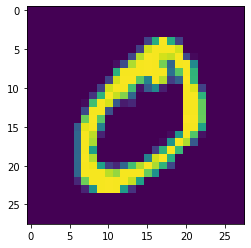

In [7]:
plt.imshow(single_image)

As this is a Classification Problem, we need to change the Target Variable into a Categorical Data 

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

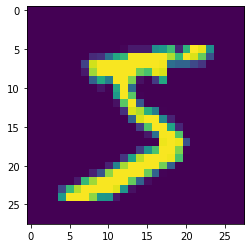

In [10]:
X_train=X_train/255
plt.imshow(X_train[0])

In [11]:
X_test=X_test/255

Pre-Processing The Data to introduce the Dimensionality to Scales

In [12]:
X_train.shape
X_train=X_train.reshape(60000,28,28,1)

In [13]:
X_test.shape
X_test=X_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(2,2),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#The FLatten model is being fed into Dense Layer Network
model.add(Dense(128,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [23]:
model.fit(X_train,y_train_cat,epochs=50,validation_data=(X_test,y_test_cat),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 30s 15ms/step - loss: 0.3539 - accuracy: 0.8905 - val_loss: 0.0893 - val_accuracy: 0.9724
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0746 - accuracy: 0.9786 - val_loss: 0.0675 - val_accuracy: 0.9780
Epoch 3/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0538 - val_accuracy: 0.9828
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0487 - val_accuracy: 0.9837
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 6/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 7/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0566 -

In [25]:
loss=pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,0.201202,0.939233,0.089337,0.9724
1,0.069085,0.979417,0.067461,0.9780
2,0.043658,0.986650,0.053809,0.9828
3,0.030946,0.990217,0.048668,0.9837
4,0.020698,0.993717,0.052954,0.9834
5,0.015337,0.995217,0.059798,0.9816
6,0.011923,0.996050,0.056566,0.9846


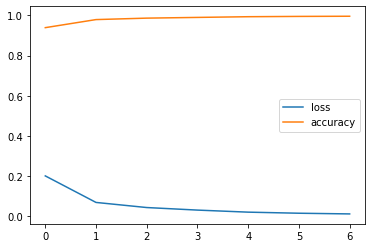

In [31]:
loss[['loss','accuracy']].plot()

In [38]:
from sklearn.metrics import classification_report
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

